In [1]:
import base64
import datetime
import time
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels as sm
from pylab import rcParams
from numpy import median
import matplotlib.dates as mdates

np.random.seed(1337)
%matplotlib inline
sns.set(font_scale=1.5)
rcParams['figure.figsize'] = 12, 8
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

# Load the Data

In [2]:
tr = pd.read_csv('input/train_ver2.csv', dtype={
        'age': np.str,
        'antiguedad': np.str,
        'indrel_1mes': np.str,
        'conyuemp': np.str})
len(tr)

13647309

In [3]:
tr.head().T

,0,1,2,3,4
fecha_dato,2015-01-28,2015-01-28,2015-01-28,2015-01-28,2015-01-28
ncodpers,1375586,1050611,1050612,1050613,1050614
ind_empleado,N,N,N,N,N
pais_residencia,ES,ES,ES,ES,ES
sexo,H,V,V,H,V
age,35,23,23,22,23
fecha_alta,2015-01-12,2012-08-10,2012-08-10,2012-08-10,2012-08-10
ind_nuevo,0,0,0,0,0
antiguedad,6,35,35,35,35
indrel,1,1,1,1,1


In [4]:
tr.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

# Examine Each Feature

## fecha_dato (measurement date)

In [5]:
col_name = 'fecha_dato'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  17
------------------------------ 
top 10 values:
2016-05-28    931453
2016-04-28    928274
2016-03-28    925076
2016-02-28    920904
2016-01-28    916269
2015-12-28    912021
2015-11-28    906109
2015-10-28    892251
2015-09-28    865440
2015-08-28    843201
Name: fecha_dato, dtype: int64
------------------------------ 
bottom 10 values:
2015-10-28    892251
2015-09-28    865440
2015-08-28    843201
2015-07-28    829817
2015-06-28    632110
2015-05-28    631957
2015-04-28    630367
2015-03-28    629209
2015-02-28    627394
2015-01-28    625457
Name: fecha_dato, dtype: int64
------------------------------


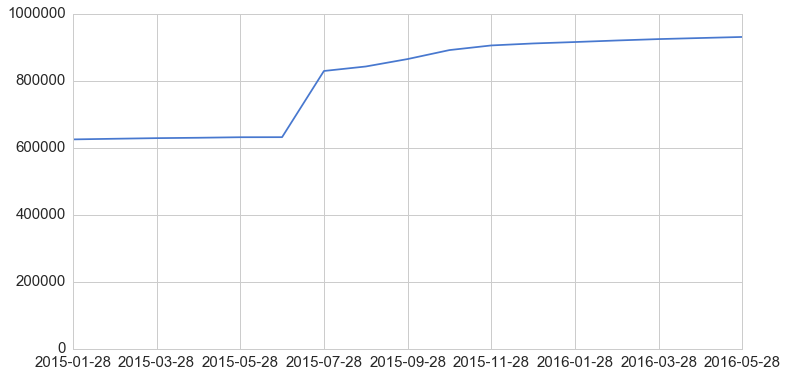

In [6]:
_ = plt.figure(figsize=(12,6))
tr.fecha_dato.value_counts().iloc[::-1].plot()
_ = plt.ylim((0, 1000000))

## ncodpers (customer code)

In [7]:
col_name = 'ncodpers'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            int64
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  956645
------------------------------ 
top 10 values:
32752      17
1273696    17
1224536    17
1199940    17
1208128    17
1150780    17
1158968    17
1117996    17
1126184    17
1134372    17
Name: ncodpers, dtype: int64
------------------------------ 
bottom 10 values:
1550404    1
1550297    1
1468385    1
1437091    1
1534863    1
1549150    1
1543059    1
1535935    1
1551255    1
1489485    1
Name: ncodpers, dtype: int64
------------------------------


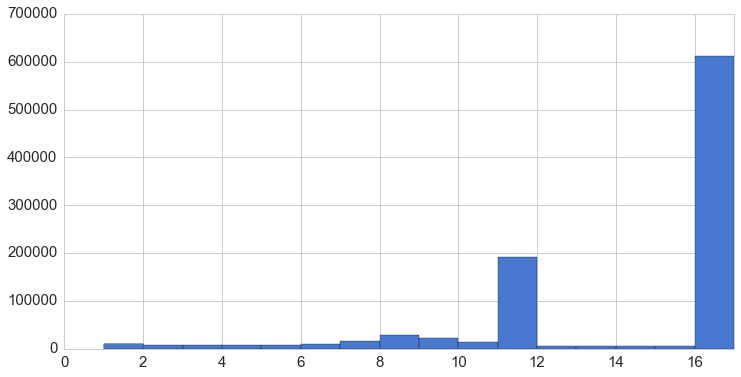

In [8]:
_ = plt.figure(figsize=(12,6))
_ = plt.hist(tr.ncodpers.value_counts(), bins=16)
_ = plt.xlim((0, 17))

## ind_empleado (employment index)

In [9]:
col_name = 'ind_empleado'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      27734
------------------------------ 
np.na ratio:      0.00203219550462
------------------------------ 
distinct values:  5
------------------------------ 
top 10 values:
N    13610977
B        3566
F        2523
A        2492
S          17
Name: ind_empleado, dtype: int64
------------------------------ 
bottom 10 values:
N    13610977
B        3566
F        2523
A        2492
S          17
Name: ind_empleado, dtype: int64
------------------------------


## pais_residencia (country of residence)

In [10]:
col_name = 'pais_residencia'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      27734
------------------------------ 
np.na ratio:      0.00203219550462
------------------------------ 
distinct values:  118
------------------------------ 
top 10 values:
ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
US        3651
CO        3526
IT        2947
RO        2931
MX        2573
Name: pais_residencia, dtype: int64
------------------------------ 
bottom 10 values:
LV    17
LY    17
IS    17
KH    17
KW    17
DJ    11
ZW    11
JM    11
BM     6
MT     2
Name: pais_residencia, dtype: int64
------------------------------


## sexo (gender)

In [11]:
col_name = 'sexo'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      27804
------------------------------ 
np.na ratio:      0.00203732472094
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
V    7424252
H    6195253
Name: sexo, dtype: int64
------------------------------ 
bottom 10 values:
V    7424252
H    6195253
Name: sexo, dtype: int64
------------------------------


## age

In [12]:
col_name = 'age'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  121
------------------------------ 
top 10 values:
 23    779884
 22    736314
 24    734785
 21    675988
 25    472016
 20    422867
 26    347778
 43    324303
 44    322955
 42    319713
Name: age, dtype: int64
------------------------------ 
bottom 10 values:
112    188
113    117
115     82
116     63
114     22
117     14
163      8
127      8
126      3
164      3
Name: age, dtype: int64
------------------------------


In [13]:
def fix_number(x):
    try:
        return int(x)
    except:
        return np.nan

In [14]:
tr.age = tr.age.apply(fix_number)

In [15]:
col_name = 'age'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            float64
------------------------------ 
np.na count:      27734
------------------------------ 
np.na ratio:      0.00203219550462
------------------------------ 
distinct values:  120
------------------------------ 
top 10 values:
23.0    779884
22.0    736314
24.0    734785
21.0    675988
25.0    472016
20.0    422867
26.0    347778
43.0    324303
44.0    322955
42.0    319713
Name: age, dtype: int64
------------------------------ 
bottom 10 values:
112.0    188
113.0    117
115.0     82
116.0     63
114.0     22
117.0     14
163.0      8
127.0      8
126.0      3
164.0      3
Name: age, dtype: int64
------------------------------


In [16]:
tr.age.dropna().describe()

count    1.361958e+07
mean     4.018146e+01
std      1.718509e+01
min      2.000000e+00
25%      2.400000e+01
50%      3.900000e+01
75%      5.000000e+01
max      1.640000e+02
Name: age, dtype: float64

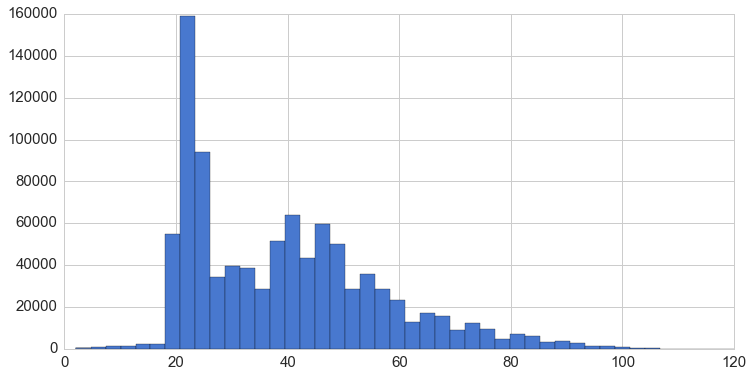

In [17]:
_ = plt.figure(figsize=(12,6))
_ = plt.hist(tr.groupby('ncodpers').first().age.dropna(), bins=60)
_ = plt.xlim((0, 120))

## fecha_alta (date of becoming a customer)

In [18]:
col_name = 'fecha_alta'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      27734
------------------------------ 
np.na ratio:      0.00203219550462
------------------------------ 
distinct values:  6756
------------------------------ 
top 10 values:
2014-07-28    57389
2014-10-03    54287
2014-08-04    45746
2013-10-14    40804
2013-08-03    33414
2012-08-06    26223
2014-07-21    26027
2012-08-03    25409
2012-08-02    25004
2013-10-11    24751
Name: fecha_alta, dtype: int64
------------------------------ 
bottom 10 values:
2013-08-17    11
2005-07-31    11
2014-08-10    11
1995-04-23    11
2013-06-15    11
2009-09-13    11
2015-05-31     9
2014-05-01     7
2010-07-04     4
2009-12-25     4
Name: fecha_alta, dtype: int64
------------------------------


## ind_nuevo (new customer indicator)

In [19]:
col_name = 'ind_nuevo'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            float64
------------------------------ 
np.na count:      27734
------------------------------ 
np.na ratio:      0.00203219550462
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
0.0    12808368
1.0      811207
Name: ind_nuevo, dtype: int64
------------------------------ 
bottom 10 values:
0.0    12808368
1.0      811207
Name: ind_nuevo, dtype: int64
------------------------------


## antiguedad (customer seniority in months)

In [20]:
col_name = 'antiguedad'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  259
------------------------------ 
top 10 values:
     12    243160
     21    214795
     10    206165
      9    177957
     23    177839
     33    174352
     45    168847
     24    167059
     36    164425
      8    155703
Name: antiguedad, dtype: int64
------------------------------ 
bottom 10 values:
    248    2271
    249    1777
    250    1512
    251    1071
    252     676
    253     416
    254     261
    255     179
    256     102
-999999      38
Name: antiguedad, dtype: int64
------------------------------


In [21]:
tr.antiguedad = tr.antiguedad.apply(fix_number)
tr.loc[tr.antiguedad < 0, 'antiguedad'] = np.nan

In [22]:
col_name = 'antiguedad'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            float64
------------------------------ 
np.na count:      27772
------------------------------ 
np.na ratio:      0.00203497993634
------------------------------ 
distinct values:  257
------------------------------ 
top 10 values:
12.0    243160
21.0    214795
10.0    206165
9.0     177957
23.0    177839
33.0    174352
45.0    168847
24.0    167059
36.0    164425
8.0     155703
Name: antiguedad, dtype: int64
------------------------------ 
bottom 10 values:
247.0    3516
248.0    2271
249.0    1777
250.0    1512
251.0    1071
252.0     676
253.0     416
254.0     261
255.0     179
256.0     102
Name: antiguedad, dtype: int64
------------------------------


In [23]:
tr.antiguedad.dropna().describe()

count    1.361954e+07
mean     7.938226e+01
std      6.637447e+01
min      0.000000e+00
25%      2.300000e+01
50%      5.000000e+01
75%      1.350000e+02
max      2.560000e+02
Name: antiguedad, dtype: float64

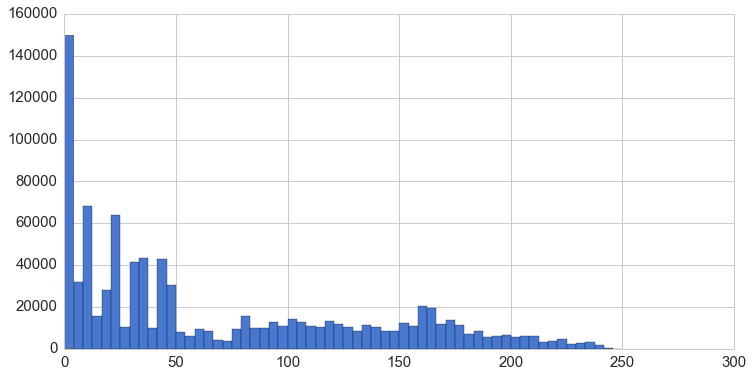

In [24]:
_ = plt.figure(figsize=(12,6))
_ = plt.hist(tr.groupby('ncodpers').first().antiguedad.dropna(), bins=60)

## indrel (primary customer indicator)

In [25]:
col_name = 'indrel'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            float64
------------------------------ 
np.na count:      27734
------------------------------ 
np.na ratio:      0.00203219550462
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
1.0     13594782
99.0       24793
Name: indrel, dtype: int64
------------------------------ 
bottom 10 values:
1.0     13594782
99.0       24793
Name: indrel, dtype: int64
------------------------------


## ult_fec_cli_1t (last date as primary customer if he isn't at the end of the month)

In [26]:
col_name = 'ult_fec_cli_1t'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      13622516
------------------------------ 
np.na ratio:      0.998183304855
------------------------------ 
distinct values:  223
------------------------------ 
top 10 values:
2015-12-24    763
2015-12-28    521
2015-07-09    443
2015-07-06    405
2015-07-01    401
2015-07-21    391
2015-07-07    340
2015-07-17    330
2015-07-10    320
2015-07-28    311
Name: ult_fec_cli_1t, dtype: int64
------------------------------ 
bottom 10 values:
2016-03-07    55
2015-11-06    54
2015-08-14    51
2016-03-24    49
2016-03-23    46
2015-08-19    44
2016-04-28    44
2015-08-06    41
2016-01-04    34
2015-12-23    27
Name: ult_fec_cli_1t, dtype: int64
------------------------------


## indrel_1mes (customer type at the beginning of the month)

In [27]:
col_name = 'indrel_1mes'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      149781
------------------------------ 
np.na ratio:      0.0109751307016
------------------------------ 
distinct values:  9
------------------------------ 
top 10 values:
1.0    9133383
1      4357298
3.0       2780
3         1570
P          874
2.0        740
2          577
4.0        223
4           83
Name: indrel_1mes, dtype: int64
------------------------------ 
bottom 10 values:
1.0    9133383
1      4357298
3.0       2780
3         1570
P          874
2.0        740
2          577
4.0        223
4           83
Name: indrel_1mes, dtype: int64
------------------------------


In [28]:
def fix_customer_type(x):
    if x == 'P':
        return 'P'
    else:
        try:
            return str(int(x))
        except:
            return np.nan

In [29]:
tr.indrel_1mes = tr.indrel_1mes.apply(fix_customer_type)

In [30]:
col_name = 'indrel_1mes'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      9286907
------------------------------ 
np.na ratio:      0.68049364164
------------------------------ 
distinct values:  5
------------------------------ 
top 10 values:
1    4357298
3       1570
P        874
2        577
4         83
Name: indrel_1mes, dtype: int64
------------------------------ 
bottom 10 values:
1    4357298
3       1570
P        874
2        577
4         83
Name: indrel_1mes, dtype: int64
------------------------------


## tiprel_1mes (customer relation type at the beginning of the month)

In [31]:
col_name = 'tiprel_1mes'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      149781
------------------------------ 
np.na ratio:      0.0109751307016
------------------------------ 
distinct values:  5
------------------------------ 
top 10 values:
I    7304875
A    6187123
P       4656
R        870
N          4
Name: tiprel_1mes, dtype: int64
------------------------------ 
bottom 10 values:
I    7304875
A    6187123
P       4656
R        870
N          4
Name: tiprel_1mes, dtype: int64
------------------------------


## indresi (indicator of the residence and the bank being in the same country)

In [32]:
col_name = 'indresi'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      27734
------------------------------ 
np.na ratio:      0.00203219550462
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
S    13553711
N       65864
Name: indresi, dtype: int64
------------------------------ 
bottom 10 values:
S    13553711
N       65864
Name: indresi, dtype: int64
------------------------------


## indext (indicator if the birth country is different from bank country)

In [33]:
col_name = 'indext'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      27734
------------------------------ 
np.na ratio:      0.00203219550462
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
N    12974839
S      644736
Name: indext, dtype: int64
------------------------------ 
bottom 10 values:
N    12974839
S      644736
Name: indext, dtype: int64
------------------------------


## conyuemp (indicator if the customer is the spouse of an employee)

In [34]:
col_name = 'conyuemp'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      13645501
------------------------------ 
np.na ratio:      0.99986751967
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
N    1791
S      17
Name: conyuemp, dtype: int64
------------------------------ 
bottom 10 values:
N    1791
S      17
Name: conyuemp, dtype: int64
------------------------------


## canal_entrada (channel used by the customer to join)

In [35]:
col_name = 'canal_entrada'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      186126
------------------------------ 
np.na ratio:      0.0136382930877
------------------------------ 
distinct values:  162
------------------------------ 
top 10 values:
KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
KHK     241084
KHM     183924
KHD     116891
KHN     116608
KAS      86221
Name: canal_entrada, dtype: int64
------------------------------ 
bottom 10 values:
KHA    51
KGU    28
KGC    28
KDB    17
KGN    17
KDI    17
KDL    11
025    11
KHS     5
KHR     1
Name: canal_entrada, dtype: int64
------------------------------


## indfall (dead indicator)

In [36]:
col_name = 'indfall'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      27734
------------------------------ 
np.na ratio:      0.00203219550462
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
N    13584813
S       34762
Name: indfall, dtype: int64
------------------------------ 
bottom 10 values:
N    13584813
S       34762
Name: indfall, dtype: int64
------------------------------


## tipodom (address type)

In [37]:
col_name = 'tipodom'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            float64
------------------------------ 
np.na count:      27735
------------------------------ 
np.na ratio:      0.00203226877914
------------------------------ 
distinct values:  1
------------------------------ 
top 10 values:
1.0    13619574
Name: tipodom, dtype: int64
------------------------------ 
bottom 10 values:
1.0    13619574
Name: tipodom, dtype: int64
------------------------------


## cod_prov (address code)

In [38]:
col_name = 'cod_prov'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            float64
------------------------------ 
np.na count:      93591
------------------------------ 
np.na ratio:      0.00685783548977
------------------------------ 
distinct values:  52
------------------------------ 
top 10 values:
28.0    4409600
8.0     1275219
46.0     682304
41.0     605164
15.0     429322
30.0     396759
29.0     367023
50.0     342543
3.0      313397
11.0     294684
Name: cod_prov, dtype: int64
------------------------------ 
bottom 10 values:
49.0    50927
34.0    49282
40.0    42341
22.0    40181
5.0     38783
1.0     37704
44.0    22525
42.0    17660
52.0     9460
51.0     7218
Name: cod_prov, dtype: int64
------------------------------


## nomprov (address name)

In [39]:
col_name = 'nomprov'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      93591
------------------------------ 
np.na ratio:      0.00685783548977
------------------------------ 
distinct values:  52
------------------------------ 
top 10 values:
MADRID       4409600
BARCELONA    1275219
VALENCIA      682304
SEVILLA       605164
CORUÑA, A     429322
MURCIA        396759
MALAGA        367023
ZARAGOZA      342543
ALICANTE      313397
CADIZ         294684
Name: nomprov, dtype: int64
------------------------------ 
bottom 10 values:
ZAMORA      50927
PALENCIA    49282
SEGOVIA     42341
HUESCA      40181
AVILA       38783
ALAVA       37704
TERUEL      22525
SORIA       17660
MELILLA      9460
CEUTA        7218
Name: nomprov, dtype: int64
------------------------------


## ind_actividad_cliente (activity indicator)

In [40]:
col_name = 'ind_actividad_cliente'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            float64
------------------------------ 
np.na count:      27734
------------------------------ 
np.na ratio:      0.00203219550462
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
0.0    7384390
1.0    6235185
Name: ind_actividad_cliente, dtype: int64
------------------------------ 
bottom 10 values:
0.0    7384390
1.0    6235185
Name: ind_actividad_cliente, dtype: int64
------------------------------


## renta (gross income of the household)

In [41]:
col_name = 'renta'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            float64
------------------------------ 
np.na count:      2794375
------------------------------ 
np.na ratio:      0.204756483494
------------------------------ 
distinct values:  520994
------------------------------ 
top 10 values:
451931.22    5582
463625.16    1743
181042.20    1493
128318.52    1404
105260.88    1354
488798.49    1332
127141.50    1183
283325.67    1148
132335.73    1047
236690.34    1009
Name: renta, dtype: int64
------------------------------ 
bottom 10 values:
69650.88     1
147186.60    1
55041.57     1
106552.89    1
74566.20     1
94128.15     1
122463.33    1
31253.64     1
195859.59    1
106957.32    1
Name: renta, dtype: int64
------------------------------


In [42]:
tr.renta.dropna().describe()

count    1.085293e+07
mean     1.342543e+05
std      2.306202e+05
min      1.202730e+03
25%      6.871098e+04
50%      1.018500e+05
75%      1.559560e+05
max      2.889440e+07
Name: renta, dtype: float64

In [43]:
tr.renta.dropna().quantile(0.95)

309997.14000000001

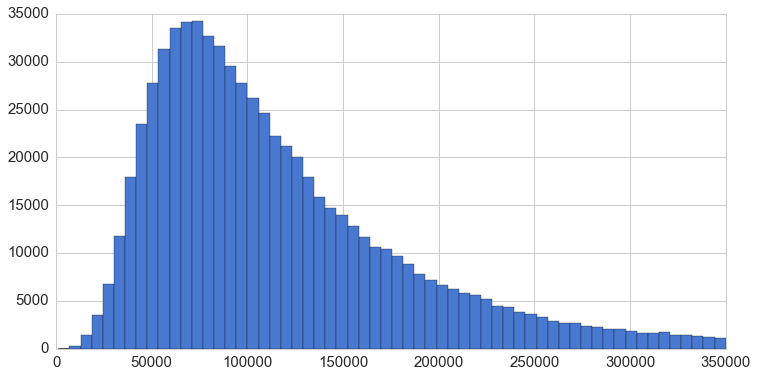

In [44]:
_ = plt.figure(figsize=(12,6))
_ = plt.hist(tr[tr.renta <= 350000].groupby('ncodpers').first().renta.dropna(), bins=60)

## segmento (customer segment)

In [45]:
col_name = 'segmento'

print '-' * 30, '\n', 'dtype:           ', tr[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', tr[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * tr[col_name].isnull().sum() / len(tr)
print '-' * 30, '\n', 'distinct values: ', len(tr[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print tr[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print tr[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      189368
------------------------------ 
np.na ratio:      0.0138758490776
------------------------------ 
distinct values:  3
------------------------------ 
top 10 values:
02 - PARTICULARES     7960220
03 - UNIVERSITARIO    4935579
01 - TOP               562142
Name: segmento, dtype: int64
------------------------------ 
bottom 10 values:
02 - PARTICULARES     7960220
03 - UNIVERSITARIO    4935579
01 - TOP               562142
Name: segmento, dtype: int64
------------------------------


## product indicators

In [46]:
for c in tr.columns[24:]:
    print '{0:20s} {1:1.6f}'.format(c, 1.0 * tr[c].sum() / len(tr))

ind_ahor_fin_ult1    0.000102
ind_aval_fin_ult1    0.000023
ind_cco_fin_ult1     0.655484
ind_cder_fin_ult1    0.000394
ind_cno_fin_ult1     0.080867
ind_ctju_fin_ult1    0.009474
ind_ctma_fin_ult1    0.009727
ind_ctop_fin_ult1    0.129008
ind_ctpp_fin_ult1    0.043306
ind_deco_fin_ult1    0.001779
ind_deme_fin_ult1    0.001661
ind_dela_fin_ult1    0.042967
ind_ecue_fin_ult1    0.082744
ind_fond_fin_ult1    0.018486
ind_hip_fin_ult1     0.005887
ind_plan_fin_ult1    0.009171
ind_pres_fin_ult1    0.002627
ind_reca_fin_ult1    0.052536
ind_tjcr_fin_ult1    0.044389
ind_valo_fin_ult1    0.025608
ind_viv_fin_ult1     0.003848
ind_nomina_ult1      0.054660
ind_nom_pens_ult1    0.059359
ind_recibo_ult1      0.127916
